In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('medical_clean.csv')
data_sel = data.iloc[:, np.r_[8:11, 14:16, 20:24, 39:42]]

for i in range(len(data_sel.columns)):
    #Compute the mean and standard deviation of each column
    mean, std = np.mean(data_sel.iloc[:,i]), np.std(data_sel.iloc[:,i])
    #Set the upper and lower bounds at three standard deviations from the mean
    upper, lower = mean + 3 * std, mean - 3 * std
    #Record the index for each row that contains a value outside the previously set boundaries
    drop = [inx for inx, x in enumerate(data_sel.iloc[:, i]) if x < lower or x > upper]
    #Compare the list of indices to be dropped with those within the dataframe and drop those that still remain
    #within the data frame while ignoring those that were already dropped
    for d in drop:
        if d in data_sel.index:
            data_sel = data_sel.drop(d)

scaled_data = pd.DataFrame(pp.StandardScaler().fit_transform(data_sel))

In [3]:
scaled_data.to_csv('OFM3_scaled.csv')

In [4]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [5]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
pca_df = pd.DataFrame(data=pca_data, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.096777,0.632705,0.449582,-0.213920,-0.382749,-1.195759,-0.042396,-0.334659,-1.053884,-0.986127,-0.585731,0.097840
1,-0.769135,0.577934,1.089704,0.613412,-0.399390,0.283626,0.001259,1.436862,1.264261,-0.832078,-0.590557,0.122625
2,-1.672484,0.626894,-0.237351,0.495042,0.123518,1.056778,0.478646,0.051242,-0.565109,0.996000,-0.504055,-0.160216
3,-1.899354,0.984080,-1.027542,-0.273716,-0.582715,1.187272,-0.696334,-0.333817,-0.602452,0.437649,0.824337,-0.117386
4,-2.092806,-1.880748,0.060786,-2.253334,0.084255,-0.677966,-0.146423,1.620085,0.865384,-0.320039,-0.099750,-0.132166
...,...,...,...,...,...,...,...,...,...,...,...,...
9331,0.799993,-1.459163,-0.195555,-0.056104,-0.857189,0.436495,-0.308526,0.935544,1.540254,-0.244240,-0.546117,0.024391
9332,1.991168,2.655220,-0.626879,-0.255679,-0.963129,-0.584668,1.285369,0.012949,-0.610805,-0.047825,-0.561583,-0.174773
9333,1.878700,-0.188691,-0.387589,0.945799,-0.965959,0.857112,0.146376,-0.067825,0.673553,-0.541587,-0.545117,-0.022814
9334,1.383593,-1.005223,-1.290890,0.767473,1.533020,0.074241,-0.303627,0.809991,0.512212,0.084074,0.194178,-0.007292


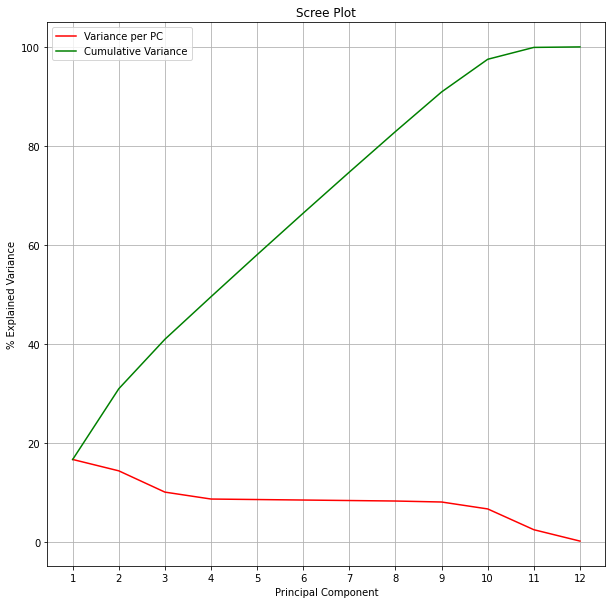

In [6]:
sum_var = []
sum_var.append(per_var[0])
for i in range(1, len(per_var)):
    sum_var.append(per_var[i] + sum_var[i-1])

plt.figure(figsize=(10,10))
sns.lineplot(x=range(1, len(per_var) + 1), y=per_var, color='r', label='Variance per PC')
sns.lineplot(x=range(1, len(per_var) + 1), y=sum_var, color='g', label='Cumulative Variance')
plt.xticks(range(1, len(per_var) + 1))
plt.ylabel('% Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.grid(b=True)
plt.legend()

In [7]:
for i in range(len(labels)):
    print(labels[i] + ': ' + str(per_var[i]))

PC1: 16.6
PC2: 14.3
PC3: 10.0
PC4: 8.6
PC5: 8.5
PC6: 8.4
PC7: 8.3
PC8: 8.2
PC9: 8.0
PC10: 6.6
PC11: 2.4
PC12: 0.1


In [8]:
for i in range(len(labels)):
    print(labels[i] + ': ' + str(np.round(sum_var[i],decimals=2)))

PC1: 16.6
PC2: 30.9
PC3: 40.9
PC4: 49.5
PC5: 58.0
PC6: 66.4
PC7: 74.7
PC8: 82.9
PC9: 90.9
PC10: 97.5
PC11: 99.9
PC12: 100.0


In [12]:
loadings = pd.DataFrame(pca.components_.T, columns=labels, index=data_sel.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Lat,-0.029794,-0.009469,-0.681450,-0.067971,0.245822,0.055728,-0.000122,-0.047493,-0.141165,0.666554,-0.004036,0.001138
Lng,-0.007092,0.009541,-0.122374,-0.113597,-0.732033,-0.496147,0.145892,0.231248,0.238329,0.241510,-0.007527,-0.000301
Population,0.034498,-0.026172,0.711077,0.028488,0.082721,0.017898,-0.005154,-0.019391,-0.010317,0.695561,0.014345,-0.000892
Children,0.033668,0.029007,-0.012683,0.227365,0.213914,0.034171,0.910566,0.021838,0.263590,-0.012044,0.003107,-0.001129
Age,0.072729,0.702225,-0.000998,-0.024673,-0.008725,0.007185,-0.011534,-0.004808,-0.026677,0.010547,0.706538,0.026033
VitD_levels,-0.001901,0.019417,0.007569,0.509286,0.231908,-0.416219,-0.064066,0.587099,-0.403912,-0.034620,-0.005945,-0.001352
Doc_visits,-0.003564,0.006999,0.030063,-0.092067,0.352103,-0.751942,-0.047730,-0.534062,0.098499,-0.062884,0.002529,-0.001386
Full_meals_eaten,-0.019922,0.030717,-0.102565,0.628026,0.018226,0.080048,-0.356855,-0.068465,0.669386,0.082204,0.010542,-0.001876
vitD_supp,0.017793,0.006642,0.025801,-0.516347,0.415655,-0.062233,-0.120017,0.555386,0.481495,-0.031953,-0.000179,-0.000158
Initial_days,0.701403,-0.078116,-0.036110,0.008470,-0.009641,-0.003375,-0.023405,-0.007207,-0.003804,-0.001903,0.031076,-0.706306
